# Occupy Controversy Scoring: Inter-coder reliability

This notebook includes the analysis for the inter-rate reliability of the controversy-coding method from "Meeting Democracy" by Donatella della Porta and Dieter Rucht applied to meetings from the Occupy movement.

We use [Krippendorff's Alpha](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha) as our metric of inter-coder reliability, computed with an adapted [impementation by Thomas Grill](https://github.com/grrrr/krippendorff-alpha/blob/master/krippendorff_alpha.py).

In [44]:
import pandas
import krippendorff_alpha as ka
reload(ka)
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [45]:
coder_scores = pandas.read_csv('response_table.csv', header=0)
coder_scores.head()

,Controversy ID,Round,DPART,DFPART,DRECI,DSYMM,DPOWER,DPSOUR,DCOOP,DCONFL,DUNCIV,DFOCUS,DATMO,DDECMOD,DDECOUT,DORIGIN,DPRESS,DDECORI,DMODERA,DMODDIS
0,1,1,4,2,2,3.0,3,0,NaN,2,2,2,2,1,1,1,2,1,2.0,1
1,2,1,8,5,2,1.0,2,4,4.0,5,3,1,3,1,2,4,2,1,1.0,3
2,3,1,3,1,1,2.0,3,1,2.0,1,1,2,1,2,5,5,1,0,1.0,3
3,4,1,14,4,1,2.0,2,3,4.0,4,3,1,3,2,4,5,2,0,1.0,3
4,5,1,6,3,2,2.0,2,4,3.0,5,2,2,2,1,1,4,3,1,1.0,3


In [69]:
codes_offset = 4
code_names = coder_scores.columns[codes_offset:]
scale_type = ['Ordinal','Ordinal','Ordinal','Nominal','Ordinal','Nominal','Ordinal','Ordinal','Ordinal','Nominal','Nominal','Nominal','Ordinal','Ordinal','Nominal','Ordinal']

num_straps = 100
variable_alpha_mean_array = []
variable_alpha_sem_array = []
variable_alpha_name_array = []
for i, code in enumerate(code_names):
    print code
    alpha_array = []
    round_1 = coder_scores[code][coder_scores['Round'] == 1]
    round_2 = coder_scores[code][coder_scores['Round'] == 2]
    
    empty_responses = np.logical_or(np.isnan(round_1[:]), np.isnan(round_2[:]))
    round_1 = round_1.values[~empty_responses]
    round_2 = round_2.values[~empty_responses]
    
    if scale_type[i] == 'Nominal':
        metric = ka.nominal_metric
    elif scale_type[i] == 'Ordinal':
        metric = ka.ordinal_metric
    elif scale_type[i] == 'Interval':
        metric = ka.interval_metric
    all_inds = np.random.choice(len(round_1),(len(round_1),num_straps))
    for strap in range(num_straps):
        inds = all_inds[:,strap]
        alpha = ka.krippendorff_alpha(np.row_stack([round_1, round_2])[:,inds],metric, missing_items='*')
        alpha_array.append(alpha)
    variable_alpha_mean_array.append(np.mean(alpha_array))
    variable_alpha_sem_array.append(np.std(alpha_array)/np.sqrt(num_straps))
    variable_alpha_name_array.append(code)

DRECI
DSYMM
DPOWER
DPSOUR
DCOOP
DCONFL
DUNCIV
DFOCUS
DATMO
DDECMOD
DDECOUT
DORIGIN
DPRESS
DDECORI
DMODERA
DMODDIS


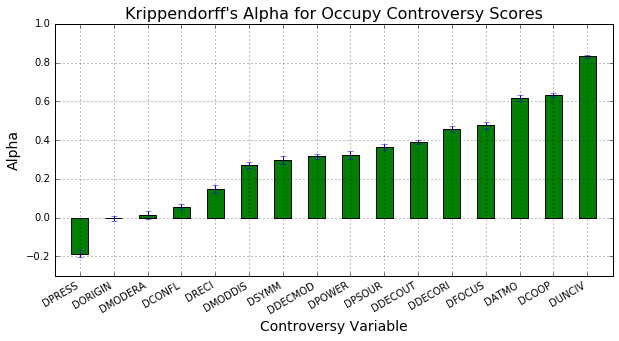

In [70]:
variable_alpha_mean_array = np.array(variable_alpha_mean_array)
variable_alpha_sem_array = np.array(variable_alpha_sem_array)
variable_alpha_name_array = np.array(variable_alpha_name_array)
scale_type = np.array(scale_type)

sort_inds = np.argsort(variable_alpha_mean_array)
variable_alpha_mean_array = variable_alpha_mean_array[sort_inds]
variable_alpha_sem_array = variable_alpha_sem_array[sort_inds]
variable_alpha_name_array = variable_alpha_name_array[sort_inds]
scale_type = scale_type[sort_inds]
plot_inds = np.arange(len(variable_alpha_mean_array))
fig, ax = plt.subplots(figsize=(10,5))
width = .5
ax.bar(plot_inds, variable_alpha_mean_array, width, yerr = variable_alpha_sem_array, color = 'g')
ax.set_xticklabels(variable_alpha_name_array.tolist())
ax.set_xticks(plot_inds +.5*width)
fig.autofmt_xdate()
ax.grid(True)
ax.set_xlim([-width, ax.get_xlim()[1]])
ax.set_ylim([-.3, 1])
ax.set_xlabel('Controversy Variable', fontsize=14)
ax.set_ylabel('Alpha', fontsize=14)
ax.set_title('Krippendorff\'s Alpha for Occupy Controversy Scores', fontsize=16)
fig.savefig('Krippendorff\'s Alpha for Occupy Controversy Scores', dpi=500)

In [97]:
data_matrix = [['Variable', 'Scale', 'Krippendorff\'s Alpha']]
for i, code in enumerate(variable_alpha_name_array):
    print "%s (%s): %.4f (+/- %.3f)" % (code, scale_type[i], variable_alpha_mean_array[i], variable_alpha_sem_array[i])

DPRESS (Ordinal): -0.1576 (+/- 0.020)
DMODERA (Nominal): -0.0597 (+/- 0.020)
DORIGIN (Nominal): 0.0067 (+/- 0.012)
DCONFL (Nominal): 0.0610 (+/- 0.011)
DRECI (Ordinal): 0.1649 (+/- 0.019)
DMODDIS (Ordinal): 0.2269 (+/- 0.016)
DSYMM (Ordinal): 0.3009 (+/- 0.020)
DPOWER (Ordinal): 0.3206 (+/- 0.019)
DDECMOD (Nominal): 0.3300 (+/- 0.014)
DPSOUR (Nominal): 0.3437 (+/- 0.014)
DDECOUT (Nominal): 0.4243 (+/- 0.012)
DDECORI (Ordinal): 0.4586 (+/- 0.018)
DFOCUS (Ordinal): 0.4665 (+/- 0.019)
DCOOP (Ordinal): 0.5448 (+/- 0.014)
DATMO (Ordinal): 0.6465 (+/- 0.014)
DUNCIV (Ordinal): 0.8200 (+/- 0.011)
